## Анализ друзей на facebook

Я буду использовать данные из проекта сетевого анализа университета Стэнфорда (SNAP), который
совместно использует большие наборы данных из социальных сетей и других источников. В част-
ности, я буду использовать их данные Facebook 1 , которые включают в себя 4039 пользователей
и 88 234 дружеских отношения между ними.

Файл данных содержит по одной строке на ребро, причем пользователи идентифицируются с по­
мощью целых чисел от 0 до 4038.

### Функция для создания графа на основе файла

In [1]:
import numpy as np
import networkx as nx

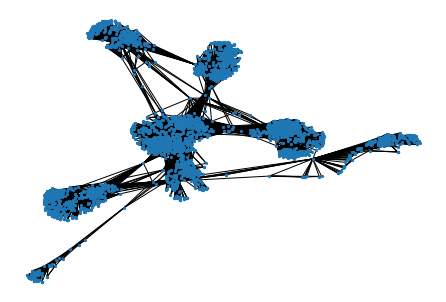

In [2]:
def create_graph_from_file(filename):
    g = nx.Graph()
    edges = np.loadtxt(filename, dtype=int)
    g.add_edges_from(edges)

    return g


g = create_graph_from_file('DATA/facebook_combined.txt')
nx.draw(g, node_size=5)

Найдем коэффициент кластеризации

In [3]:
from networkx.algorithms.approximation import average_clustering
average_clustering(g, trials=1000)

0.598

А теперь среднее расстояние

In [4]:
def sample_path_length(g, trials=1000):
    nodes = list(g)
    pairs = np.random.choice(nodes, size=(trials, 2))
    lengths = [nx.shortest_path_length(g, *pair) for pair in pairs]
    
    return lengths

def estimate_path_length(g, trials=1000):
    return np.mean(sample_path_length(g, trials))

estimate_path_length(g)

3.634

## Модель Ваттса-Строгаца
Построим граф Ваттса-Строгаца уже используя всроенную функцию, и данные что получили из  
нашего файла

In [5]:
n, m = len(g.nodes), len(g.edges)
k = round(2 * m/n) # average degree of node

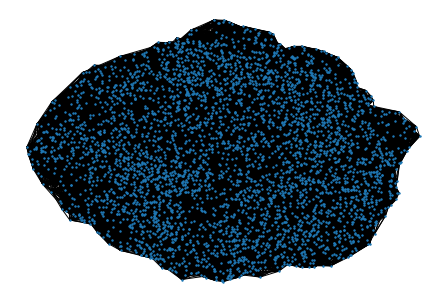

In [6]:
ws = nx.watts_strogatz_graph(n, k, p=0.05, seed=15)
nx.draw(ws, node_size=2)

In [7]:
average_clustering(ws, trials=1000), estimate_path_length(ws)

(0.63, 3.206)

## Степень
Попробуем экспериментально подтвердить значение k

In [8]:
def degrees(g):
    return np.array([g.degree(node) for node in g])

def mean_degrees(g):
    return np.mean(degrees(g))

Найдем дисперсию

In [9]:
math_expect = 44

# дисперсия
def degree_dispersion(g):
    degs = degrees(g)
    
    degs -= math_expect
    degs = degs**2
    
    return np.mean(degs)

# стандартное откланение
def st_dev(g):
    return np.sqrt(degree_dispersion(g))

st_dev(g)

52.415026317907234

Как видно стандартное откланение безумно большое, не должно так быть

In [10]:
# from IPython.display import clear_output
# from ipynb.fs.full.ProbabilityMassFunction import prob_mass_func
# clear_output()

# Probability Mass function

In [33]:
import numpy as np
from collections import Counter

def pmf_data(data):
    result = {}
    counted_data = Counter(data)
    
    unique = len(data)
    for value, frec in counted_data.items():
        yield round(frec/unique, 4), value

def prob_mass_func(data):
    res = list(pmf_data(data))
    res = sorted(res, key=lambda x: x[1])
    
    return [d[0] for d in res], [d[1] for d in res]   

## Facebook
Тут мы видем график распределения степени в данных с facebook

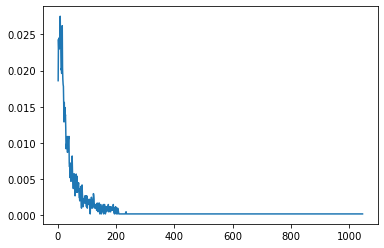

In [34]:
import matplotlib.pyplot as plt

probabilities, values = prob_mass_func(degrees(g))
plt.plot(values, probabilities)

plt.show()

## Watts Strogatz
А тут график того какое распределение у модели Ваттса-Строгаца

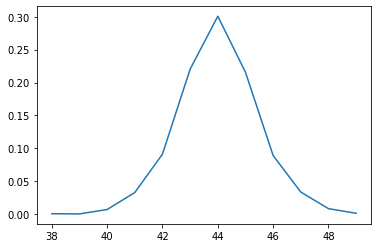

In [35]:
probabilities, values = prob_mass_func(degrees(ws))
plt.plot(values, probabilities)

plt.show()

Ну думаю разница очевидна